In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('flight_delays_train.csv')
test = pd.read_csv('flight_delays_test.csv')
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
places = pd.Series((test['Origin'].append(test['Dest']).append(train['Origin']).append(train['Dest'])).unique()).to_dict()
places_map = {v: k for k, v in places.items()}

carriers = pd.Series((test['UniqueCarrier'].append(test['UniqueCarrier']).append(train['UniqueCarrier']).append(train['UniqueCarrier'])).unique()).to_dict()
carriers_map = {v: k for k, v in carriers.items()}

In [4]:
def prepare_df(df):
    df_copy = df.copy()
    df_copy['Dest'] = df_copy['Dest'].map(places_map)
    df_copy['Origin'] = df_copy['Origin'].map(places_map)
    df_copy['UniqueCarrier'] = df_copy['UniqueCarrier'].map(carriers_map)
    df_copy['Month'] = df_copy['Month'].str.replace('c-', '').astype(int)
    df_copy['DayofMonth'] = df_copy['DayofMonth'].str.replace('c-', '').astype(int)
    df_copy['DayOfWeek'] = df_copy['DayOfWeek'].str.replace('c-', '').astype(int)
    return df_copy

In [5]:
X_train, y_train = prepare_df(train), train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_train = X_train.drop(columns=['dep_delayed_15min'])
X_test = prepare_df(test)
X_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,8,21,7,1934,7,15,9,732
1,4,20,3,1548,6,8,71,834
2,9,2,5,1422,14,57,63,416
3,11,25,6,1015,9,13,70,872
4,10,7,6,1828,1,34,45,423


**Heatmap**

In [6]:
delaydaily = pd.DataFrame(X_train[['Month', 'DayOfWeek']])
delaydaily['Delayed'] = y_train

delaydaily = delaydaily.groupby(['Month', 'DayOfWeek'], as_index=False).sum()

delaydaily_res = delaydaily.pivot('Month', 'DayOfWeek', 'Delayed')

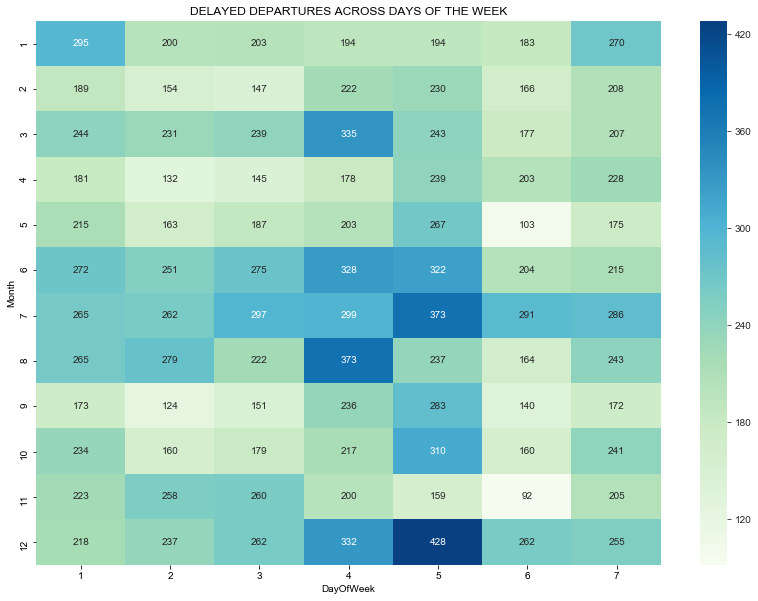

In [7]:
plt.figure(figsize = (14,10))
plt.xlabel('Month')
plt.title('DELAYED DEPARTURES ACROSS DAYS OF THE WEEK')
sns.set_style('white')
sns.heatmap(delaydaily_res, cmap='GnBu',annot=True,  fmt="d")

In [8]:
delaydaily_res

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,295,200,203,194,194,183,270
2,189,154,147,222,230,166,208
3,244,231,239,335,243,177,207
4,181,132,145,178,239,203,228
5,215,163,187,203,267,103,175
6,272,251,275,328,322,204,215
7,265,262,297,299,373,291,286
8,265,279,222,373,237,164,243
9,173,124,151,236,283,140,172


In [9]:
delaydaily = pd.DataFrame(X_train[['Month', 'DayOfWeek']])
delaydaily['Distance'] = test['Distance']
delaydaily = delaydaily.groupby(['Month', 'DayOfWeek'], as_index=False).sum()

delaydaily_res1 = delaydaily.pivot('Month', 'DayOfWeek', 'Distance')

In [10]:
delaydaily.head()

,Month,DayOfWeek,Distance
0,1,1,968263
1,1,2,914926
2,1,3,746188
3,1,4,837765
4,1,5,738488


In [11]:
delaydaily_res1.head()

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,968263,914926,746188,837765,738488,725179,914442
2,780445,755191,825640,869270,800961,690360,737483
3,841498,855083,1003216,1079956,904224,695662,764344
4,817833,823228,796577,861341,1003074,887093,881800
5,1060093,1041091,918868,769489,797574,709654,872422


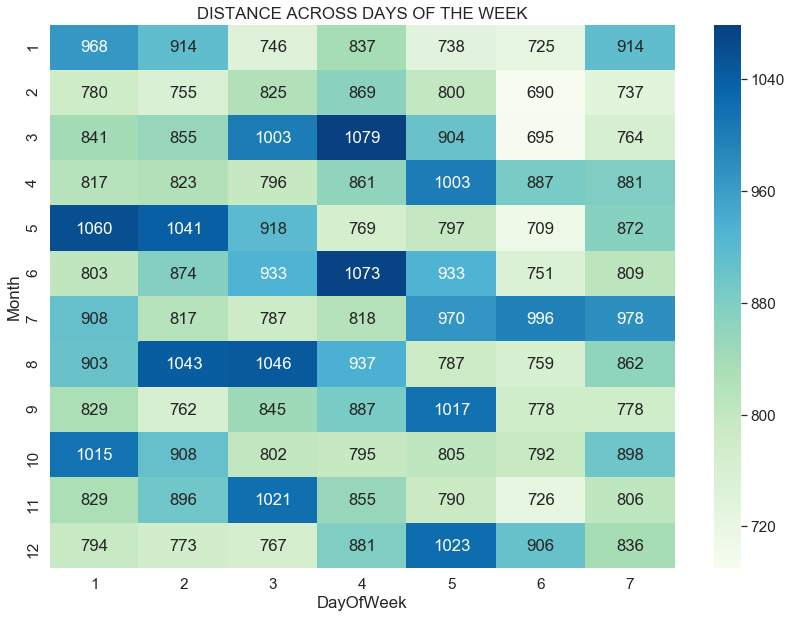

In [21]:
sns.set(font_scale=1.4)
plt.figure(figsize = (14,10))
plt.xlabel('Month')
plt.title('DISTANCE ACROSS DAYS OF THE WEEK')
sns.set_style('white')
sns.heatmap(delaydaily_res1 // 1000, cmap='GnBu',annot=True, fmt="d")

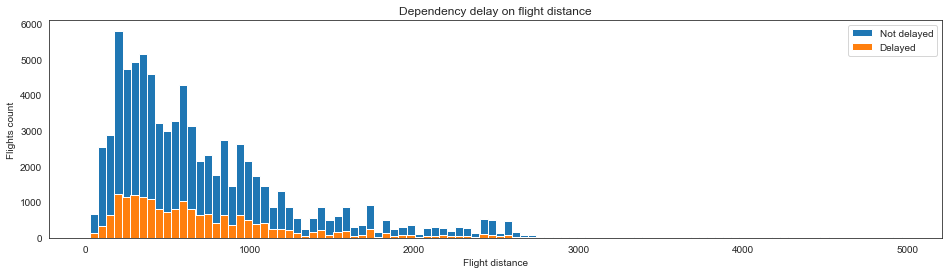

In [13]:
X_train['delayed'] = y_train

plt.figure(figsize=(16,4))
plt.hist(X_train['Distance'][X_train['delayed'] == 0], bins=100, label="Not delayed")
plt.hist(X_train['Distance'][X_train['delayed'] == 1], bins=100, label="Delayed")
plt.title(u"Dependency delay on flight distance")
plt.xlabel(u"Flight distance")
plt.ylabel(u"Flights count")
plt.legend()
plt.show()

**Corr**

In [14]:
X_train.corr()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,delayed
Month,1.000000,0.007106,0.004717,-0.001544,-0.006181,-0.007402,-0.007007,0.006853,0.016998
DayofMonth,0.007106,1.000000,-0.015537,0.001116,-0.005284,-0.007020,0.000540,0.001510,0.025842
DayOfWeek,0.004717,-0.015537,1.000000,0.009392,0.002049,0.006492,-0.000127,0.011937,0.010439
DepTime,-0.001544,0.001116,0.009392,1.000000,-0.001786,-0.097181,0.103137,-0.020681,0.243819
UniqueCarrier,-0.006181,-0.005284,0.002049,-0.001786,1.000000,0.027020,0.025905,0.056172,-0.020832
Origin,-0.007402,-0.007020,0.006492,-0.097181,0.027020,1.000000,-0.159012,-0.156326,-0.037434
Dest,-0.007007,0.000540,-0.000127,0.103137,0.025905,-0.159012,1.000000,-0.153979,0.010161
Distance,0.006853,0.001510,0.011937,-0.020681,0.056172,-0.156326,-0.153979,1.000000,-0.002734
delayed,0.016998,0.025842,0.010439,0.243819,-0.020832,-0.037434,0.010161,-0.002734,1.000000


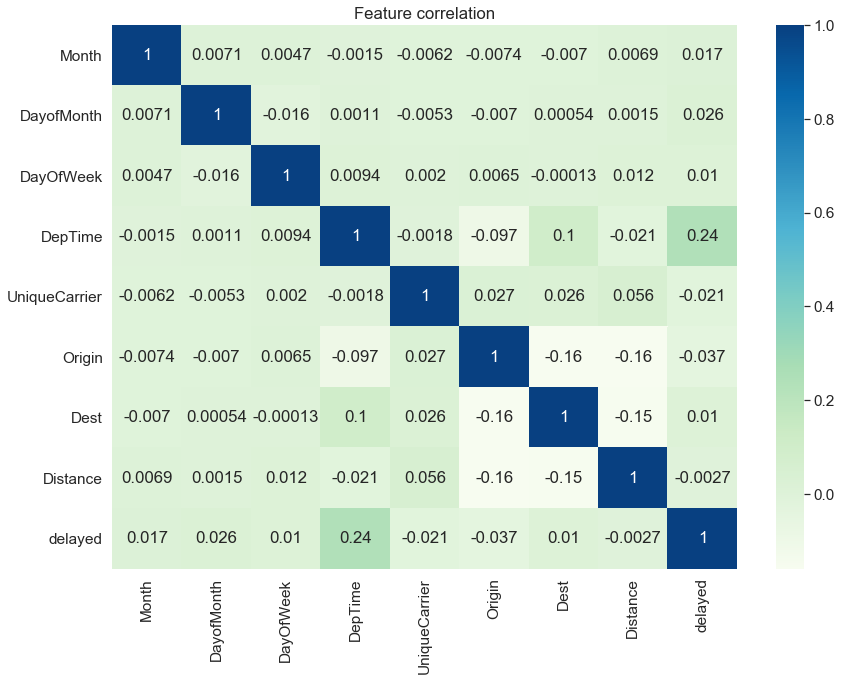

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize = (14,10))
plt.title('Feature correlation')
sns.set_style('white')
sns.heatmap(X_train.corr(), cmap='GnBu',annot=True)

In [16]:
X_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,delayed
0,8,21,7,1934,7,15,9,732,0
1,4,20,3,1548,6,8,71,834,0
2,9,2,5,1422,14,57,63,416,0
3,11,25,6,1015,9,13,70,872,0
4,10,7,6,1828,1,34,45,423,1


In [17]:
weekdays = [u"Mon", u"Tue", u"Wed", u"Thu", u"Fr", u"Sat", u"Sun"]
months = [u"Jan", u"Feb", u"Mar", u"Apr", u"May", u"Jun", u"Jul", u"Aug", u"Sep", u"Oct", u"Nov", u"Dec"]

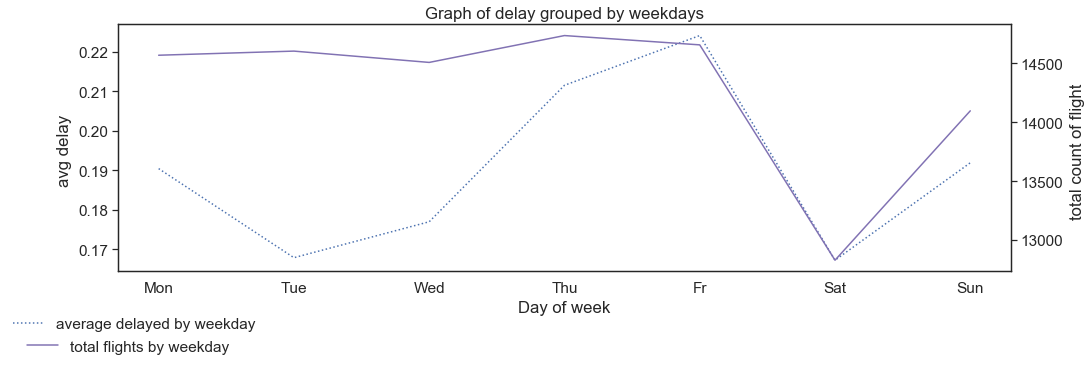

In [24]:
plt.figure(figsize=(16,10))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,8), X_train.groupby("DayOfWeek").agg({"delayed": np.mean}), 'k:', color='b')
line.set_label("average delayed by weekday")
ax0.legend(bbox_to_anchor=(.17, -0.13), frameon = False)

line2, = ax1.plot(range(1,8), list(X_train["DayOfWeek"].value_counts().sort_index()), color='m')
line2.set_label("total flights by weekday")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(4, 0.154, 'Day of week', ha='center')
ax0.text(0.25, 0.195, 'avg delay', va='center', rotation='vertical')
ax0.text(7.74, 0.195, 'total count of flight', va='center', rotation='vertical')
plt.title(u"Graph of delay grouped by weekdays")
plt.xticks(range(1,8), weekdays)
plt.show()

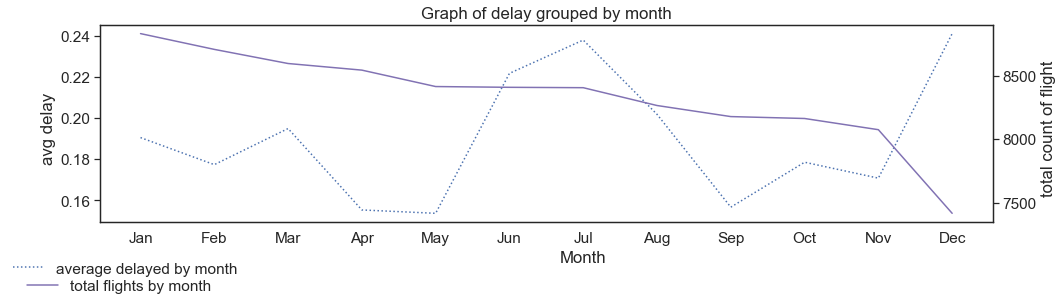

In [25]:
plt.figure(figsize=(16,8))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,13), X_train.groupby("Month").agg({"delayed": np.mean}), 'k:', color='b')
line.set_label("average delayed by month")
ax0.legend(bbox_to_anchor=(.17, -0.13), frameon = False)

line2, = ax1.plot(range(1,13), list(X_train["Month"].value_counts()), color='m')
line2.set_label("total flights by month")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(7, 0.130, 'Month', ha='center')
ax0.text(-0.35, 0.195, 'avg delay', va='center', rotation='vertical')
ax0.text(13.2, 0.195, 'total count of flight', va='center', rotation='vertical')
plt.title(u"Graph of delay grouped by month")
plt.xticks(range(1,13), months)
plt.show()

Text(0.5, 1.0, 'One else')

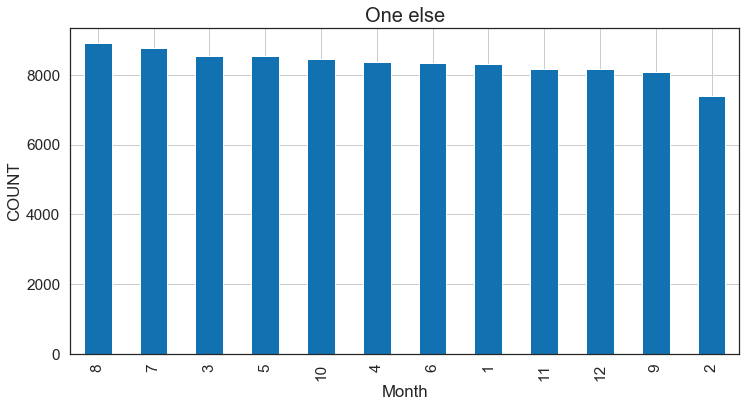

In [26]:
ax = X_test.Month.value_counts().plot(kind='bar', grid=True, color='#1272b1', figsize=(12, 6))
ax.set_xlabel('Month')
ax.set_ylabel('COUNT')
ax.set_title("One else", fontsize=20)